In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *
from initialize import *

In [2]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [3]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10.024

In [4]:
#binning in l
binl=10**np.linspace(np.log10(50), np.log10(8500), 20)

In [5]:
#try a flat distribution
dndz_f = np.zeros([400,2])
dndz_f[:, 0] = np.linspace(0.001, 4, 400)
dndz_f[:, 1] = np.ones(400)

In [6]:
cl_f = {} 
cov_f = {}
redshifts_f = {}
sliced_dndz_f = {}

for n in range(1,5):
    for btype in ["z", "n"]:
        cov_f["{0}_{1}".format(btype, n)], cl_f["{0}_{1}".format(btype, n)], redshifts_f["{0}_{1}".format(btype, n)], sliced_dndz_f["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz_f, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4)

In [7]:
stn_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        stn_f["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl_f["{0}_{1}".format(i, j)], cov = cov_f["{0}_{1}".format(i, j)], ell=ell)

In [8]:
fisher_f = {}
for i in ["z", "n"]:
    for j in range(1,5):
        global dndz_sliced
        dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)]
        fisher_f["{0}_{1}".format(i,j)] = fisher_matrix(covariance = cov_f["{0}_{1}".format(i, j)], dndz_sliced = sliced_dndz_f["{0}_{1}".format(i, j)])

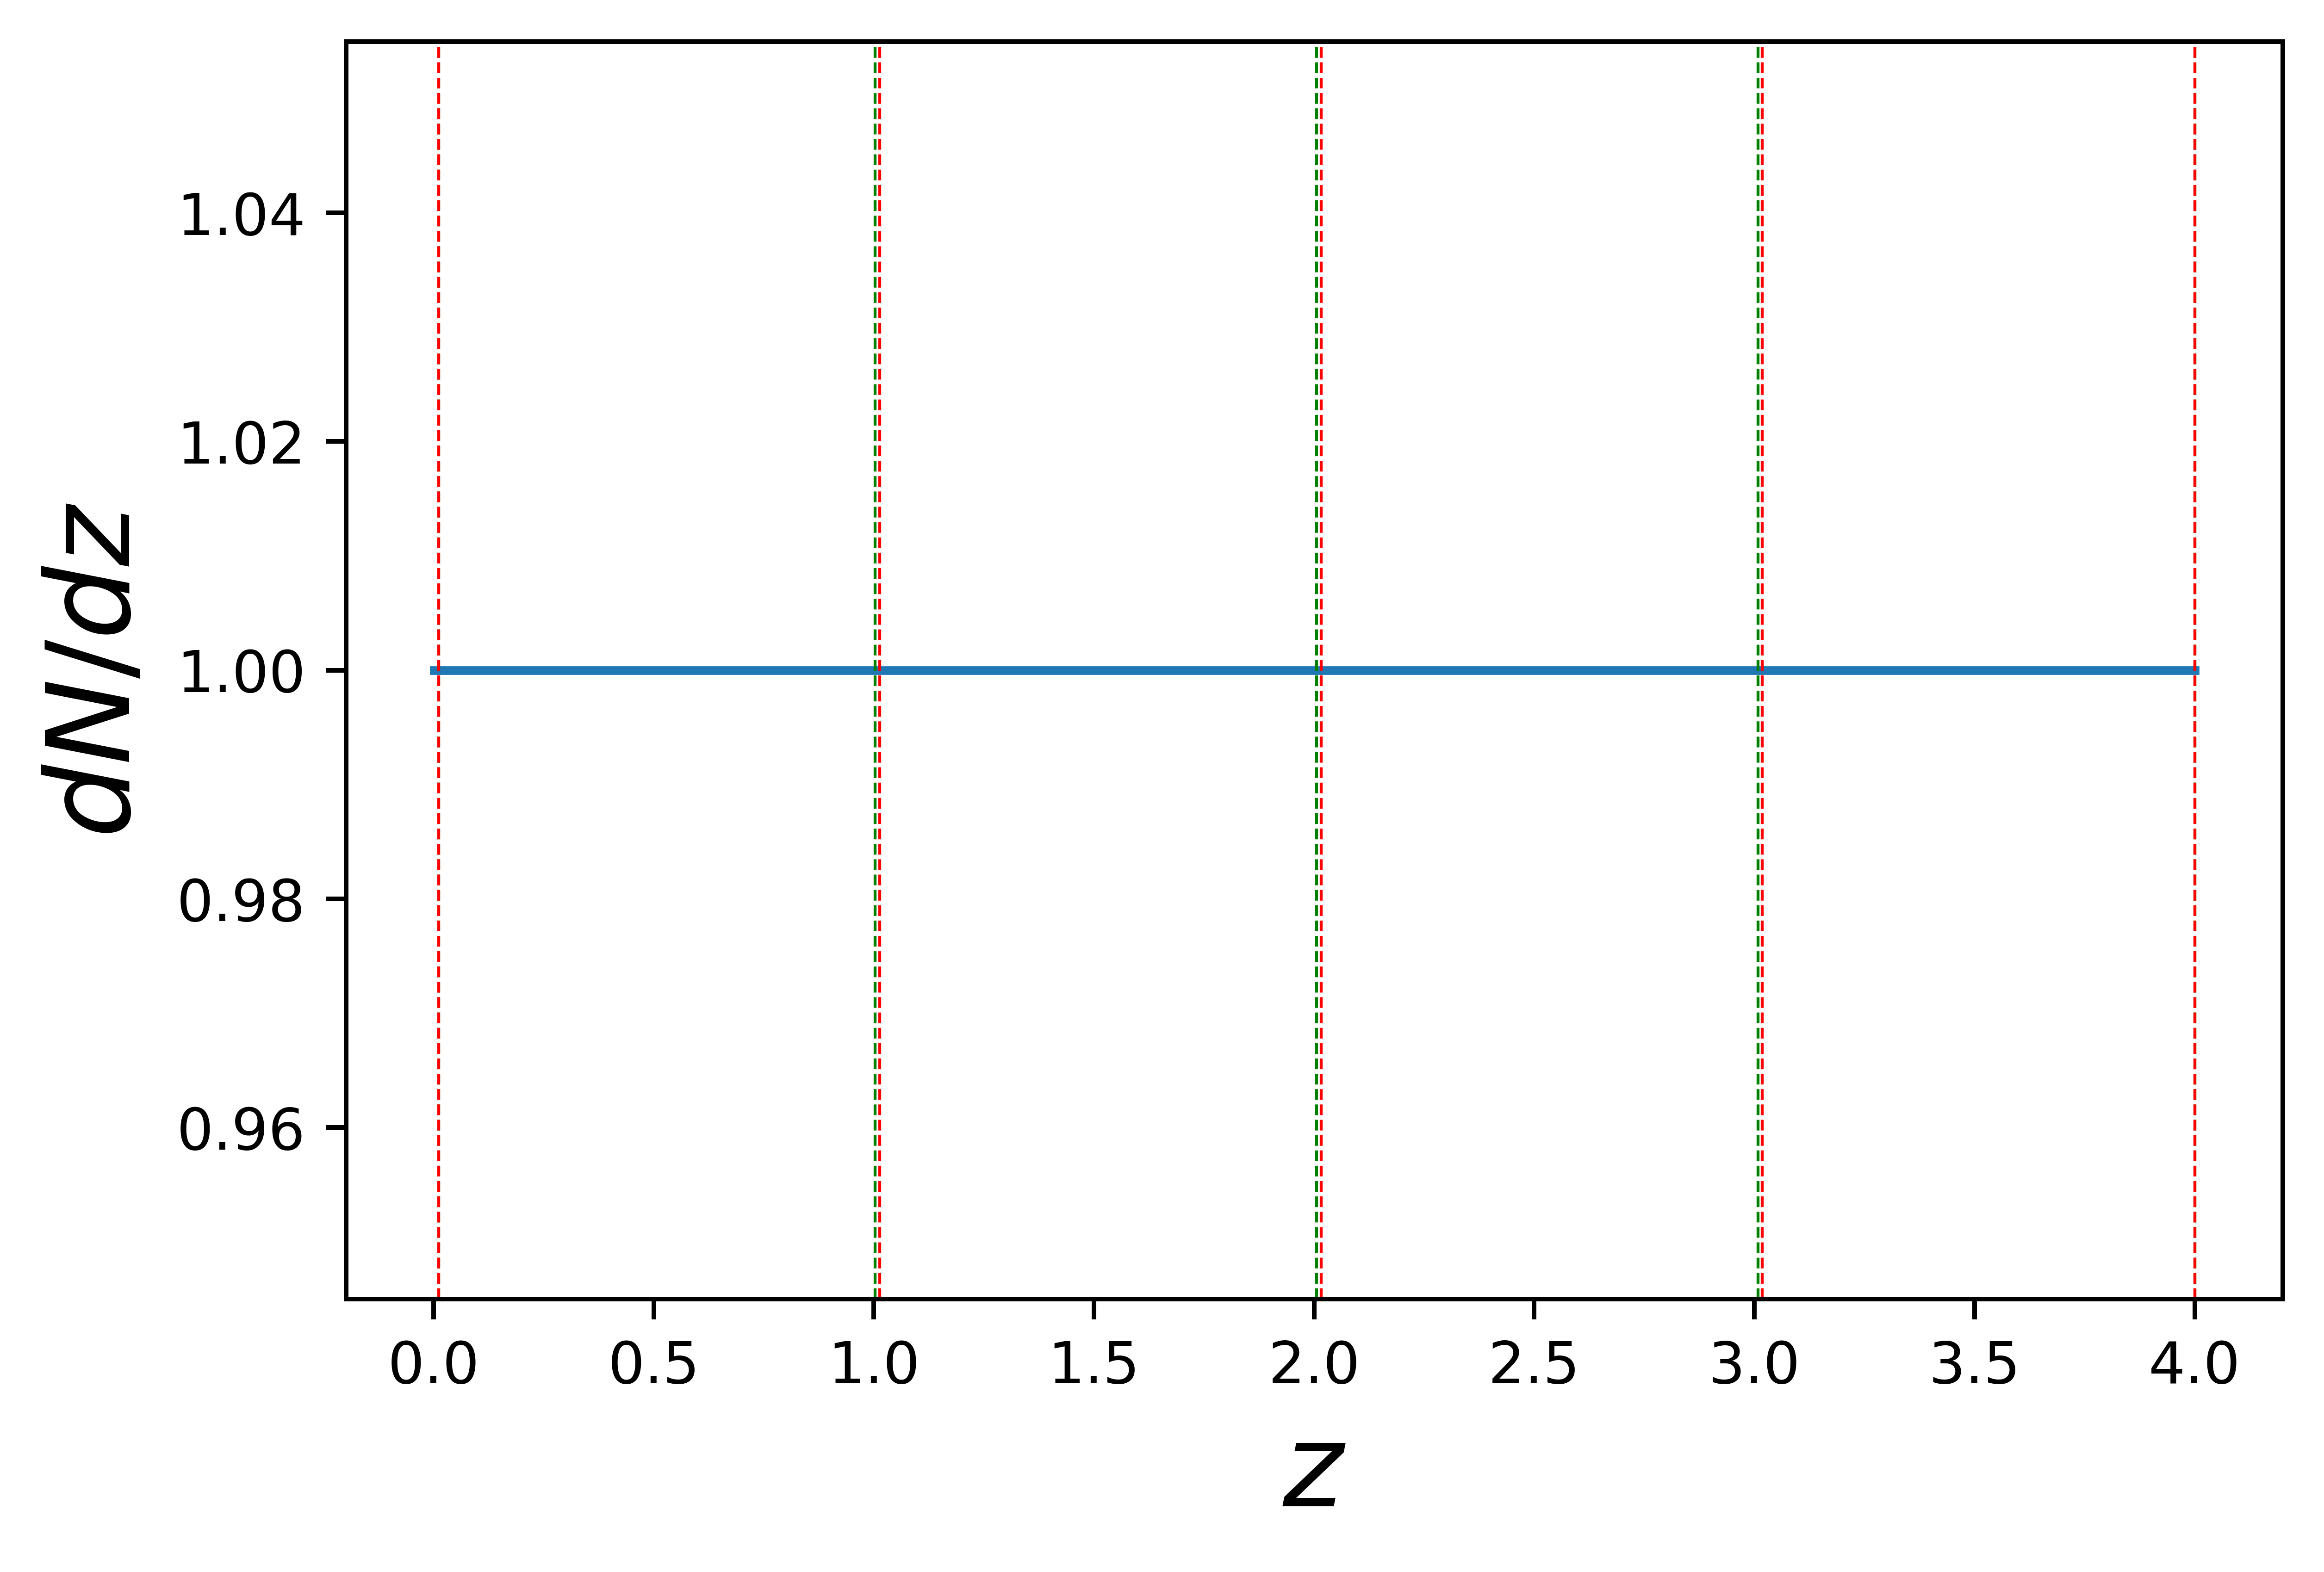

In [9]:
plt.plot(dndz_f[:,0], dndz_f[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_f["n_4"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
for x in redshifts_f["z_4"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.show()

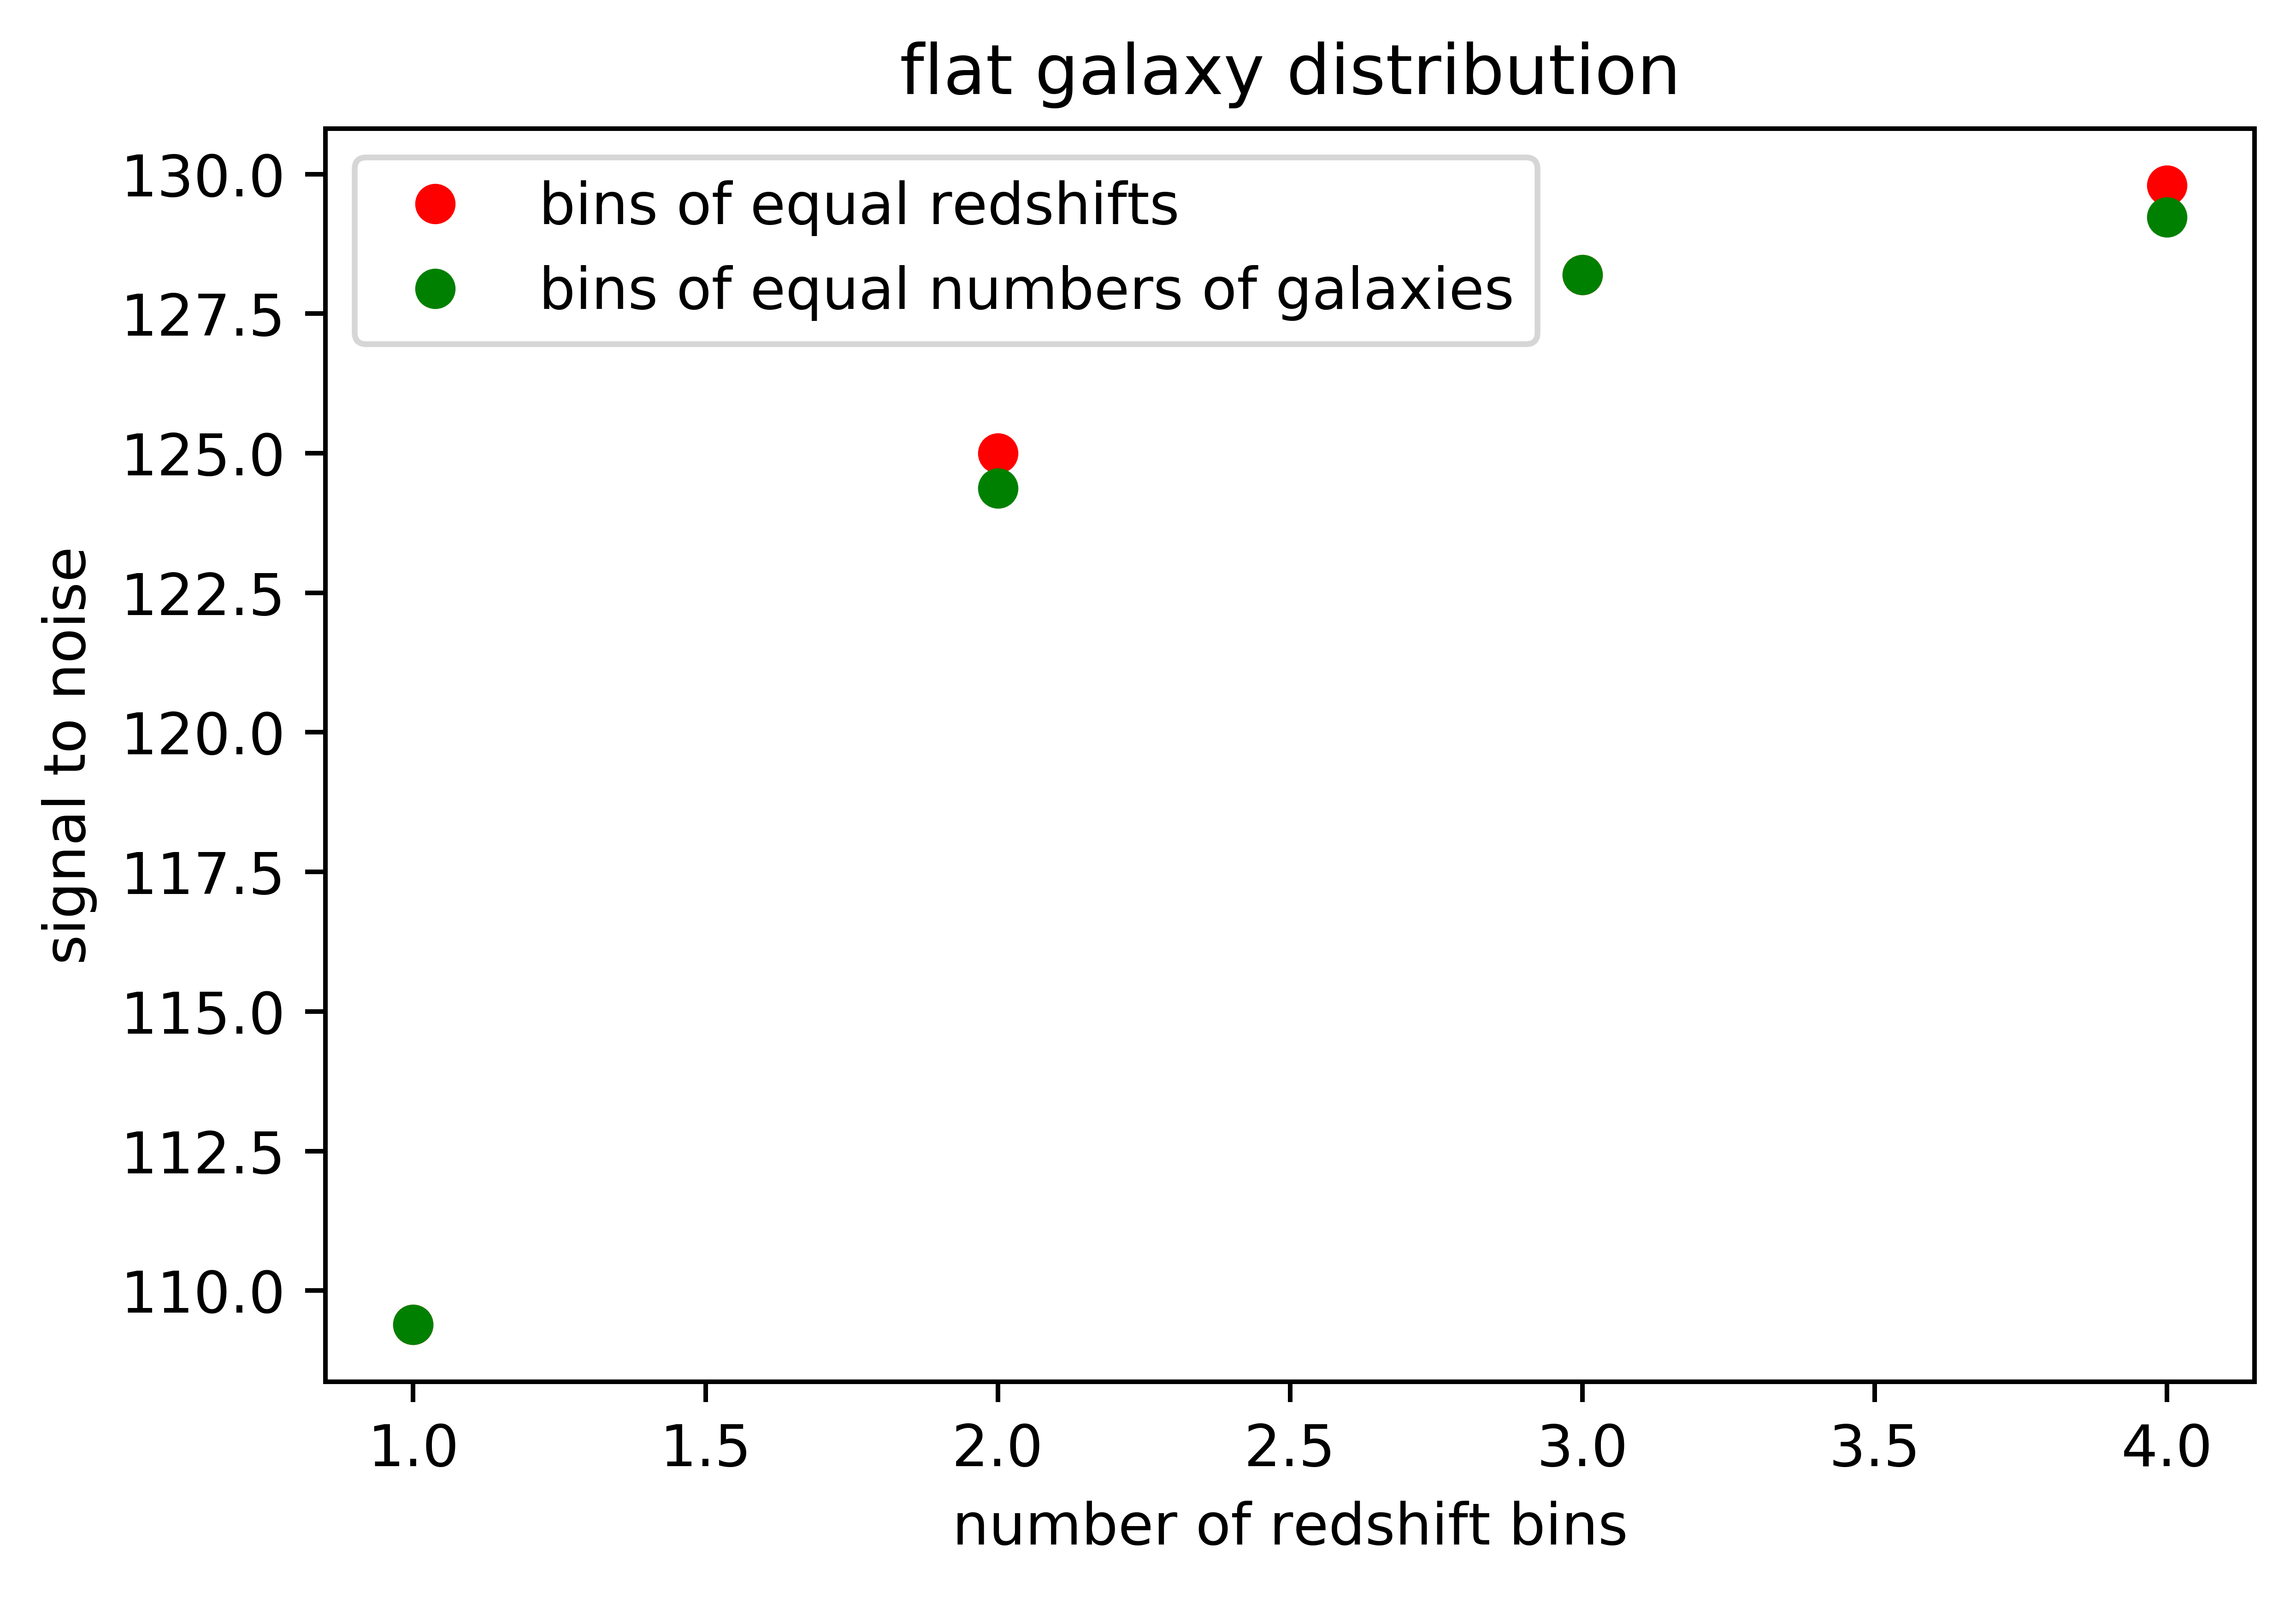

In [10]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_f["z_1"], stn_f["z_2"], stn_f["z_3"], stn_f["z_4"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [stn_f["n_1"], stn_f["n_2"], stn_f["n_3"], stn_f["n_4"]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("signal to noise")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

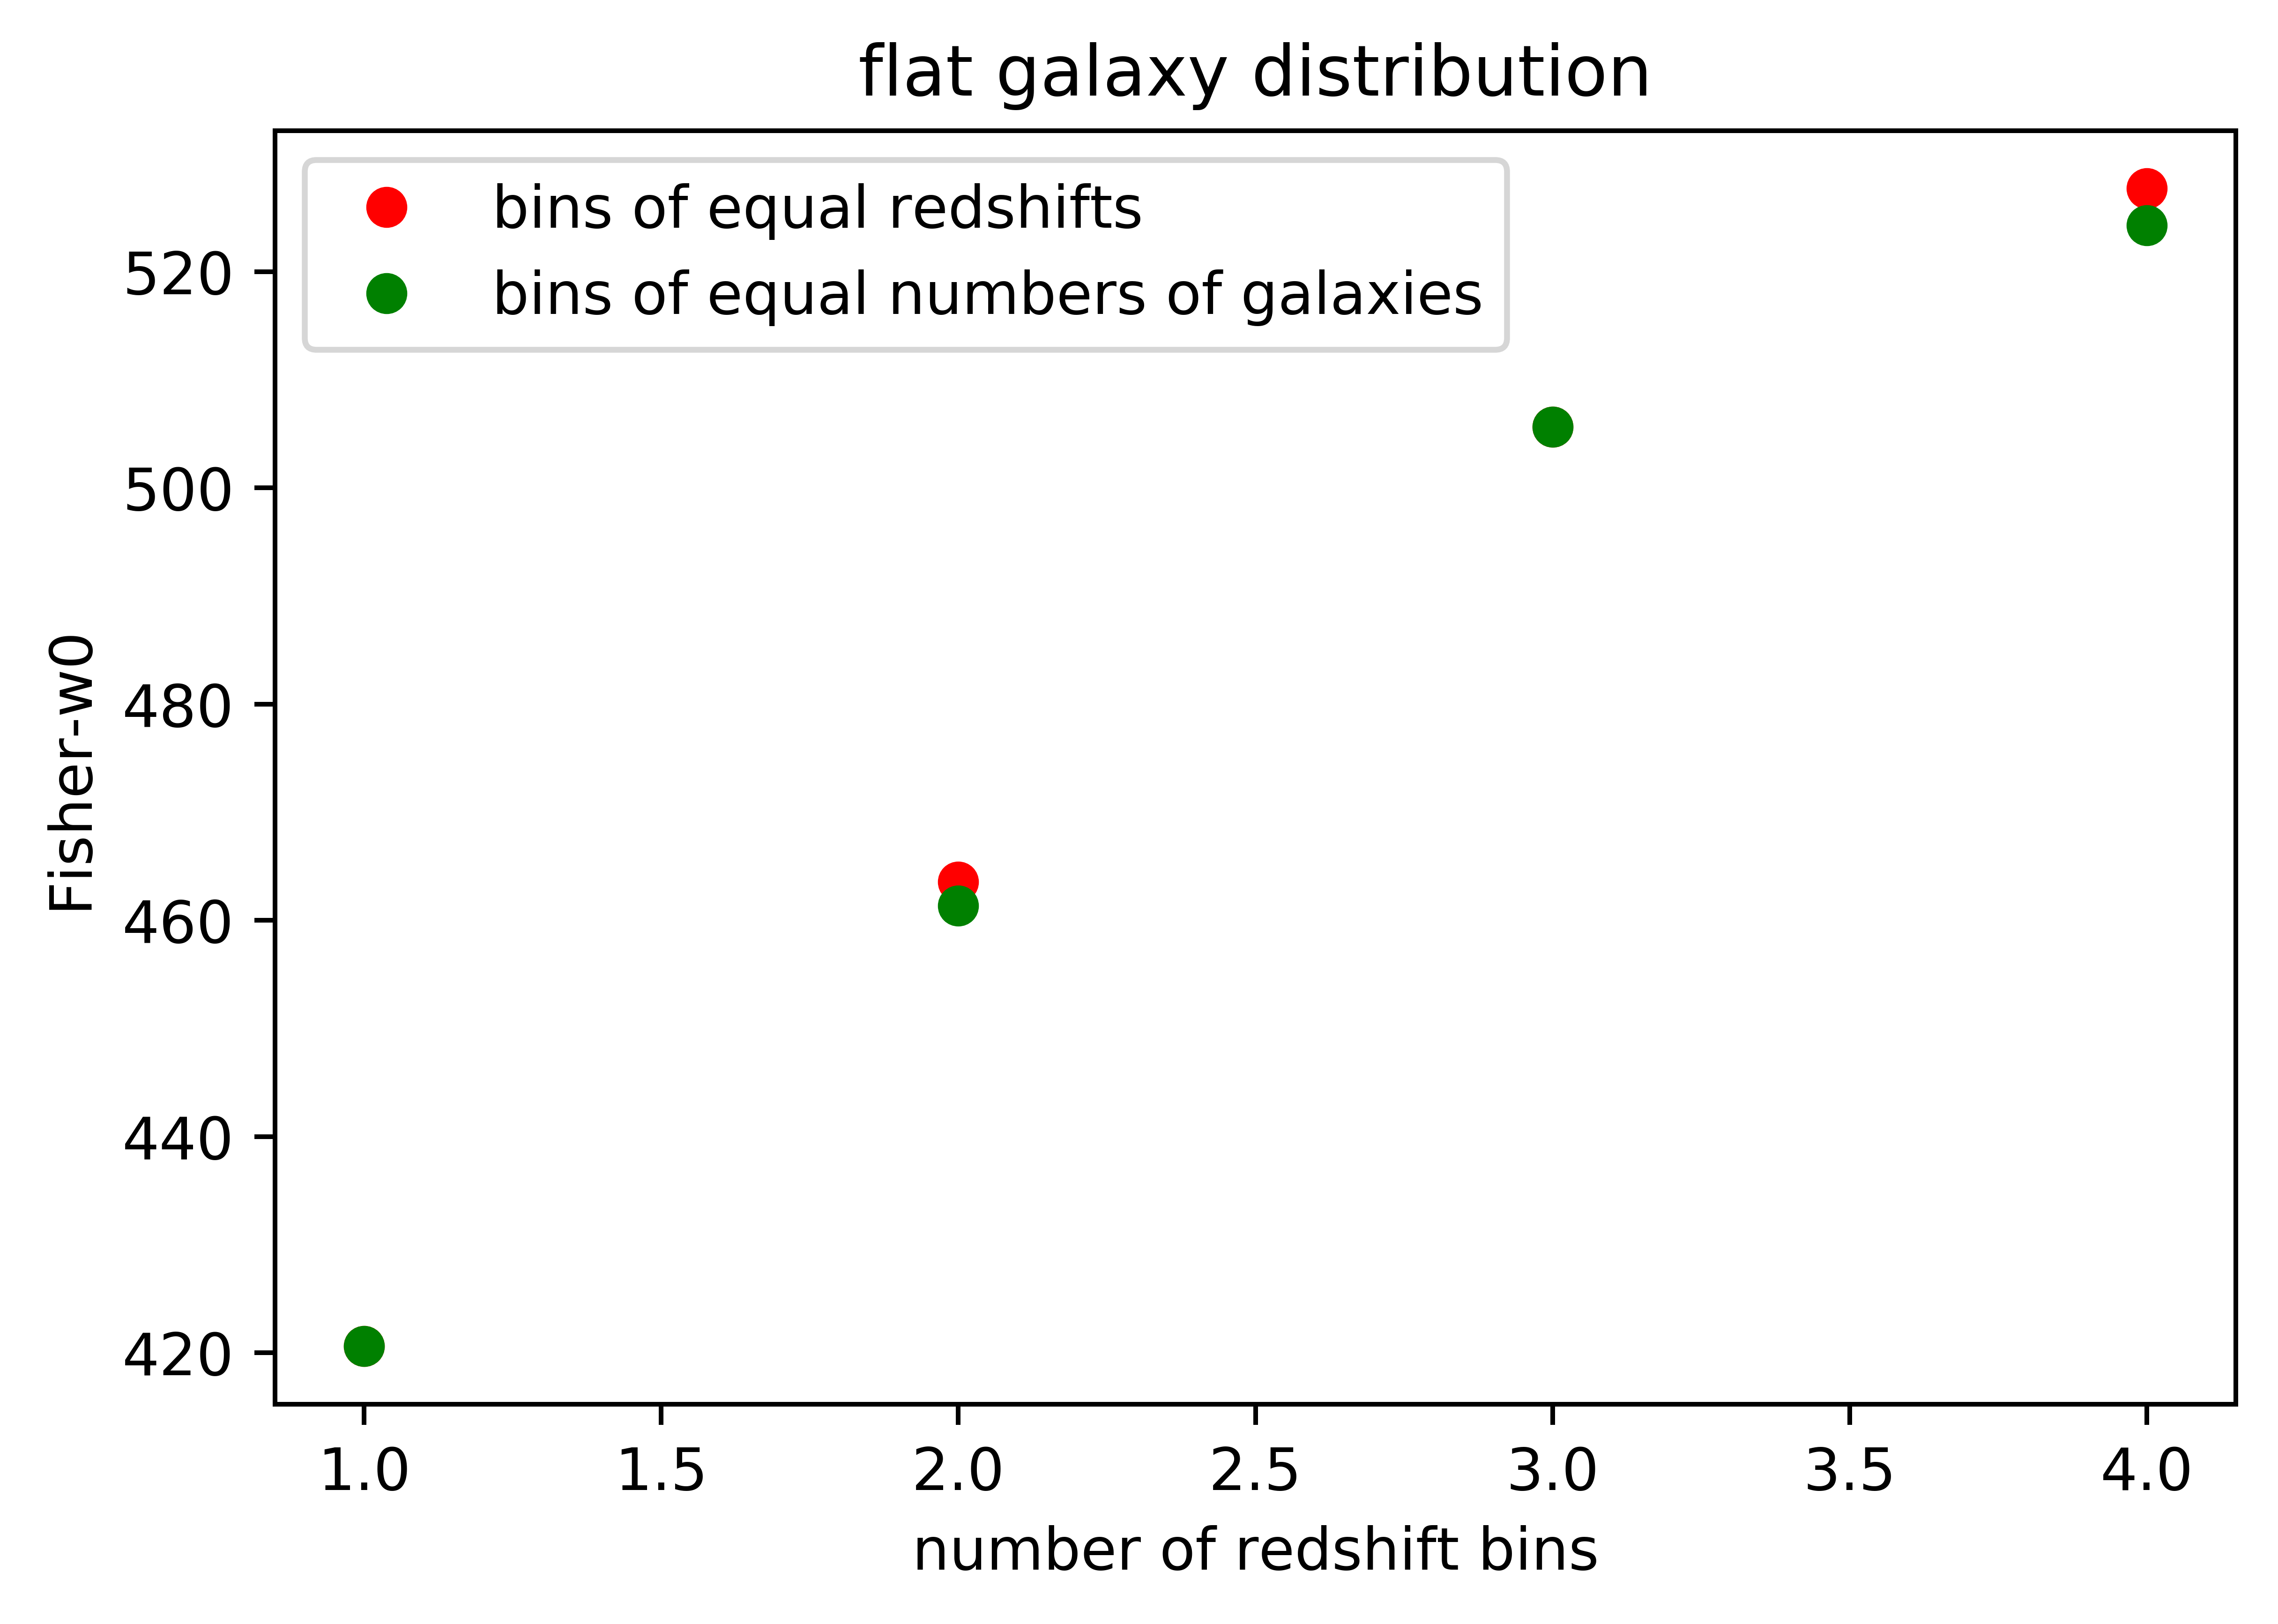

In [11]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_f["z_1"][3,3], fisher_f["z_2"][3,3], fisher_f["z_3"][3,3], fisher_f["z_4"][3,3]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [fisher_f["n_1"][3,3], fisher_f["n_2"][3,3], fisher_f["n_3"][3,3], fisher_f["n_4"][3,3]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("Fisher-w0")
plt.legend(loc="upper left")
plt.title('flat galaxy distribution')
plt.show() 

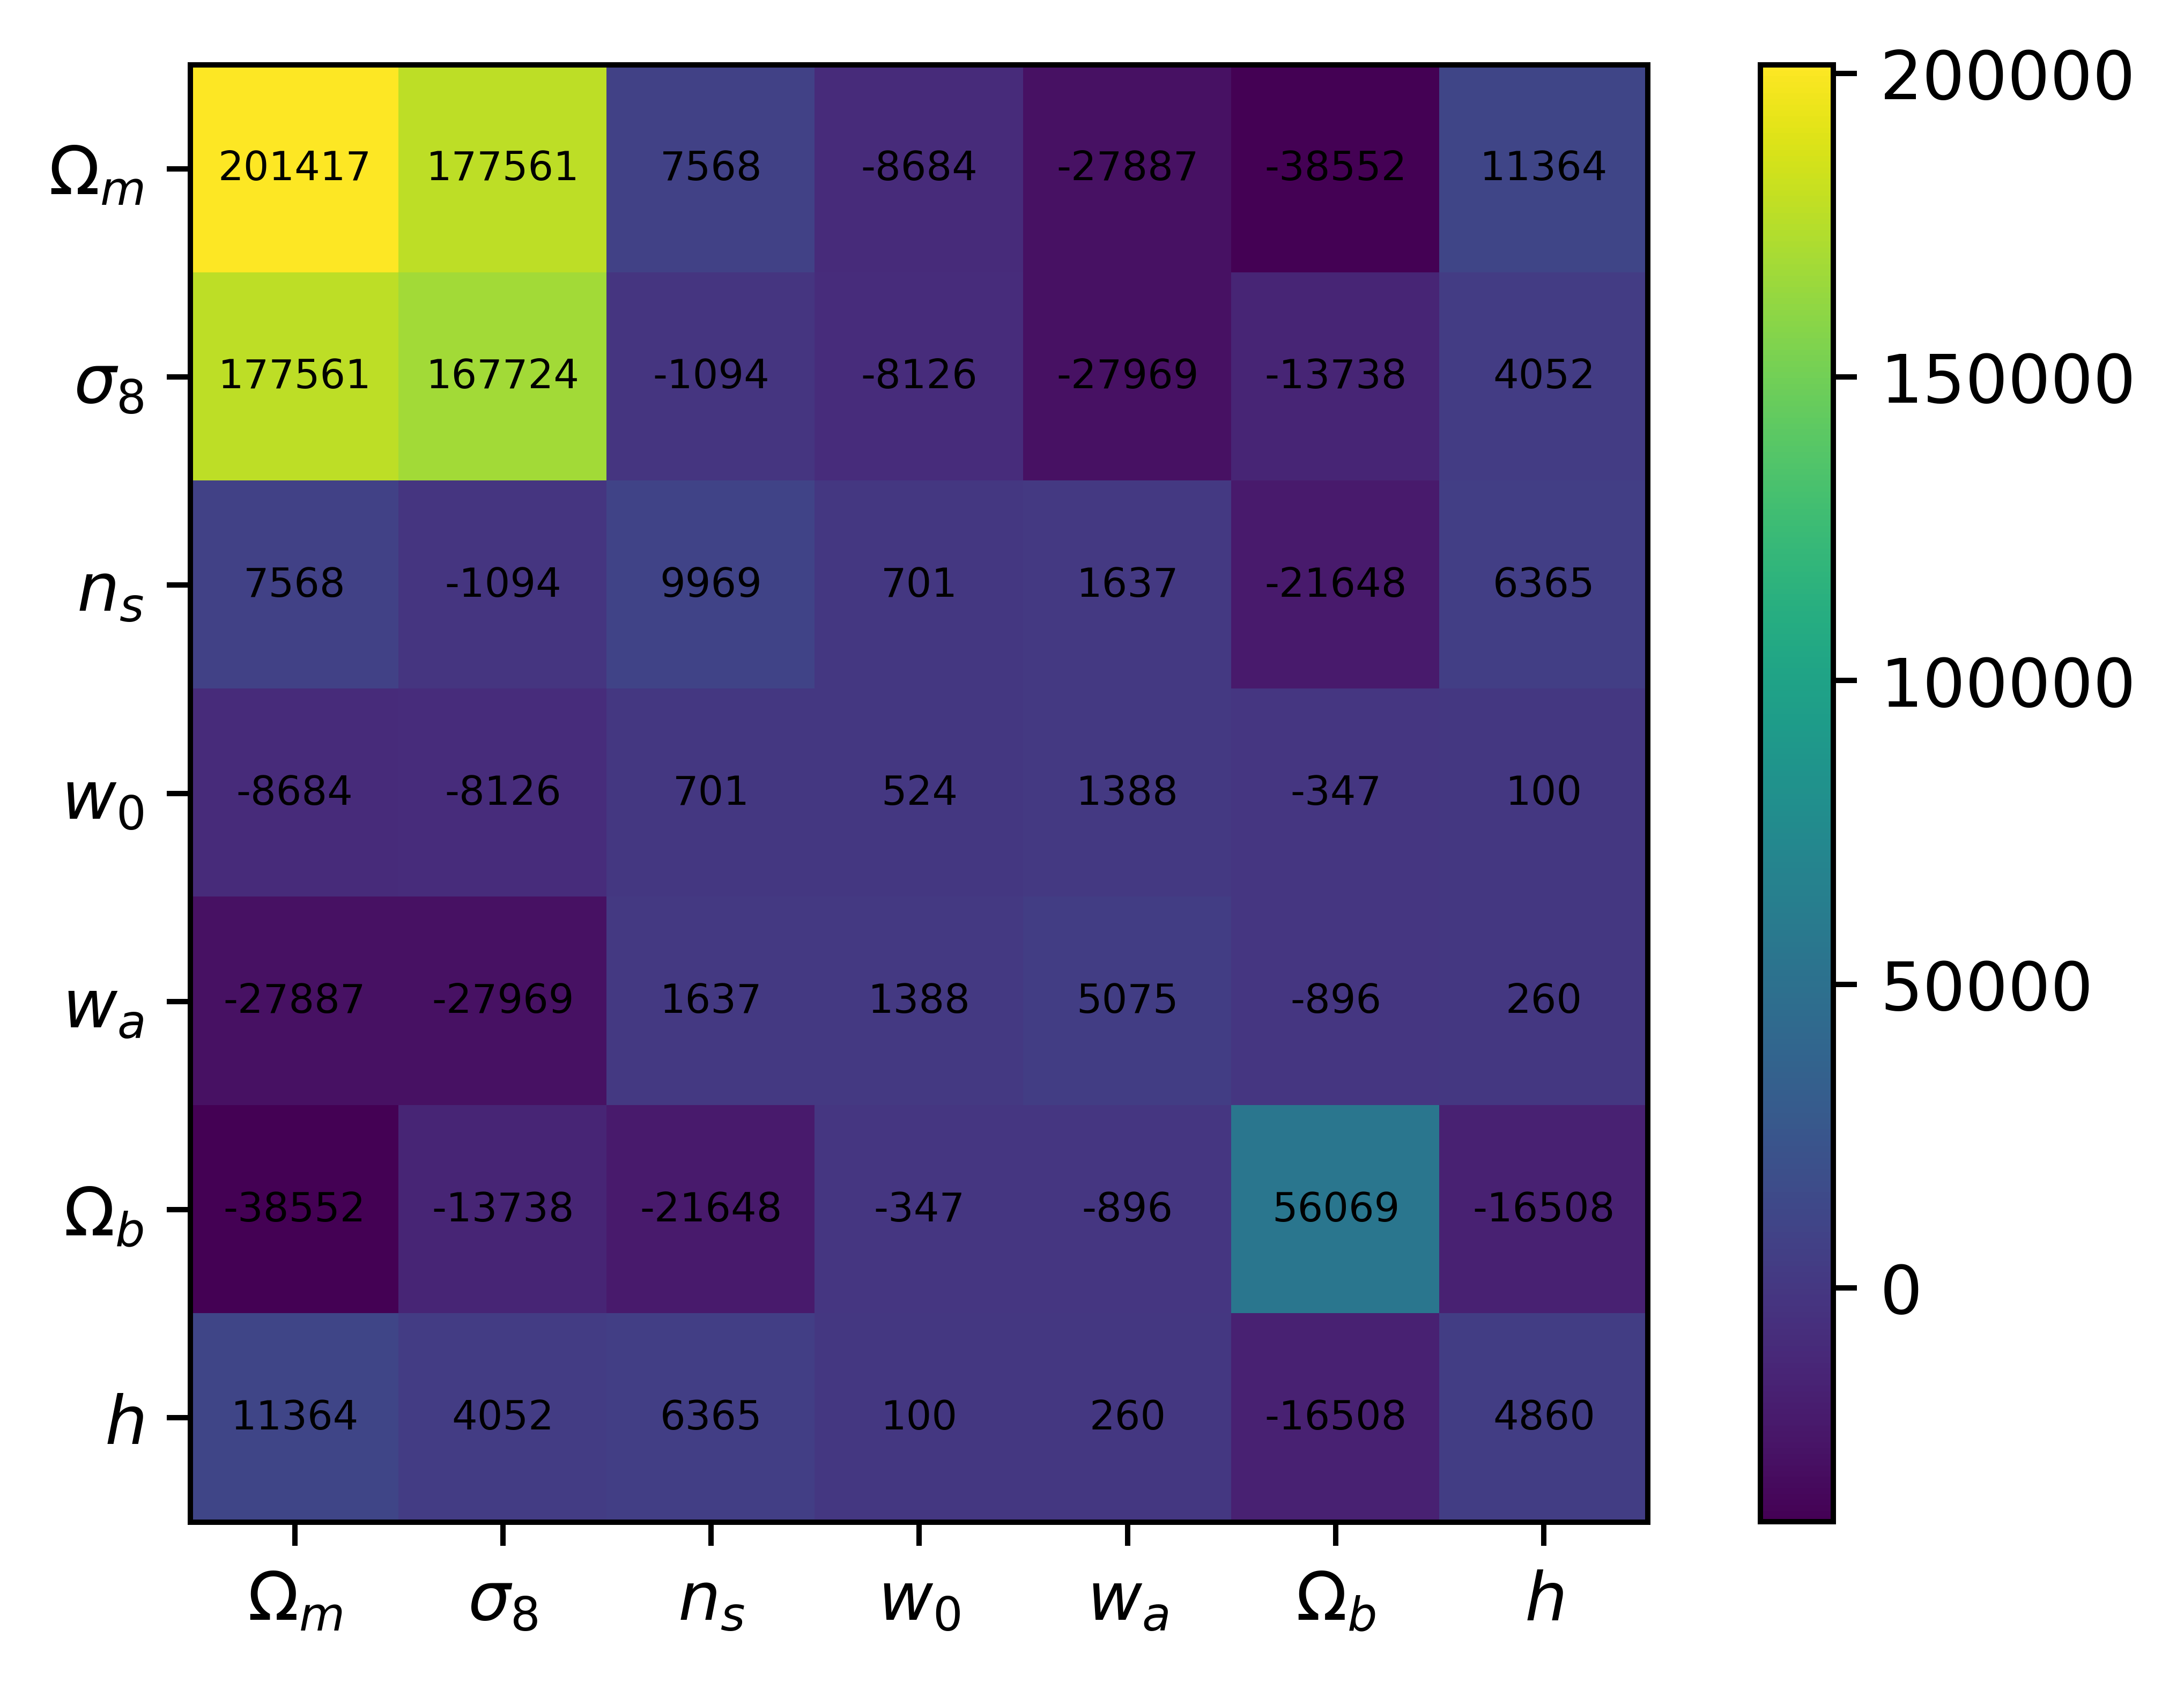

In [12]:
plt.imshow(fisher_f["n_4"])
plt.colorbar()
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$w_0$', r'$w_a$', r'$\Omega_b$', r'$h$']
plt.xticks(np.arange(7), param_labels)
plt.yticks(np.arange(7), param_labels)
for i in range(7):
    for j in range(7):
        c = fisher_f['n_4'][j,i]
        plt.text(i, j, "%.0f"%(c), va='center', ha='center', fontsize=6)

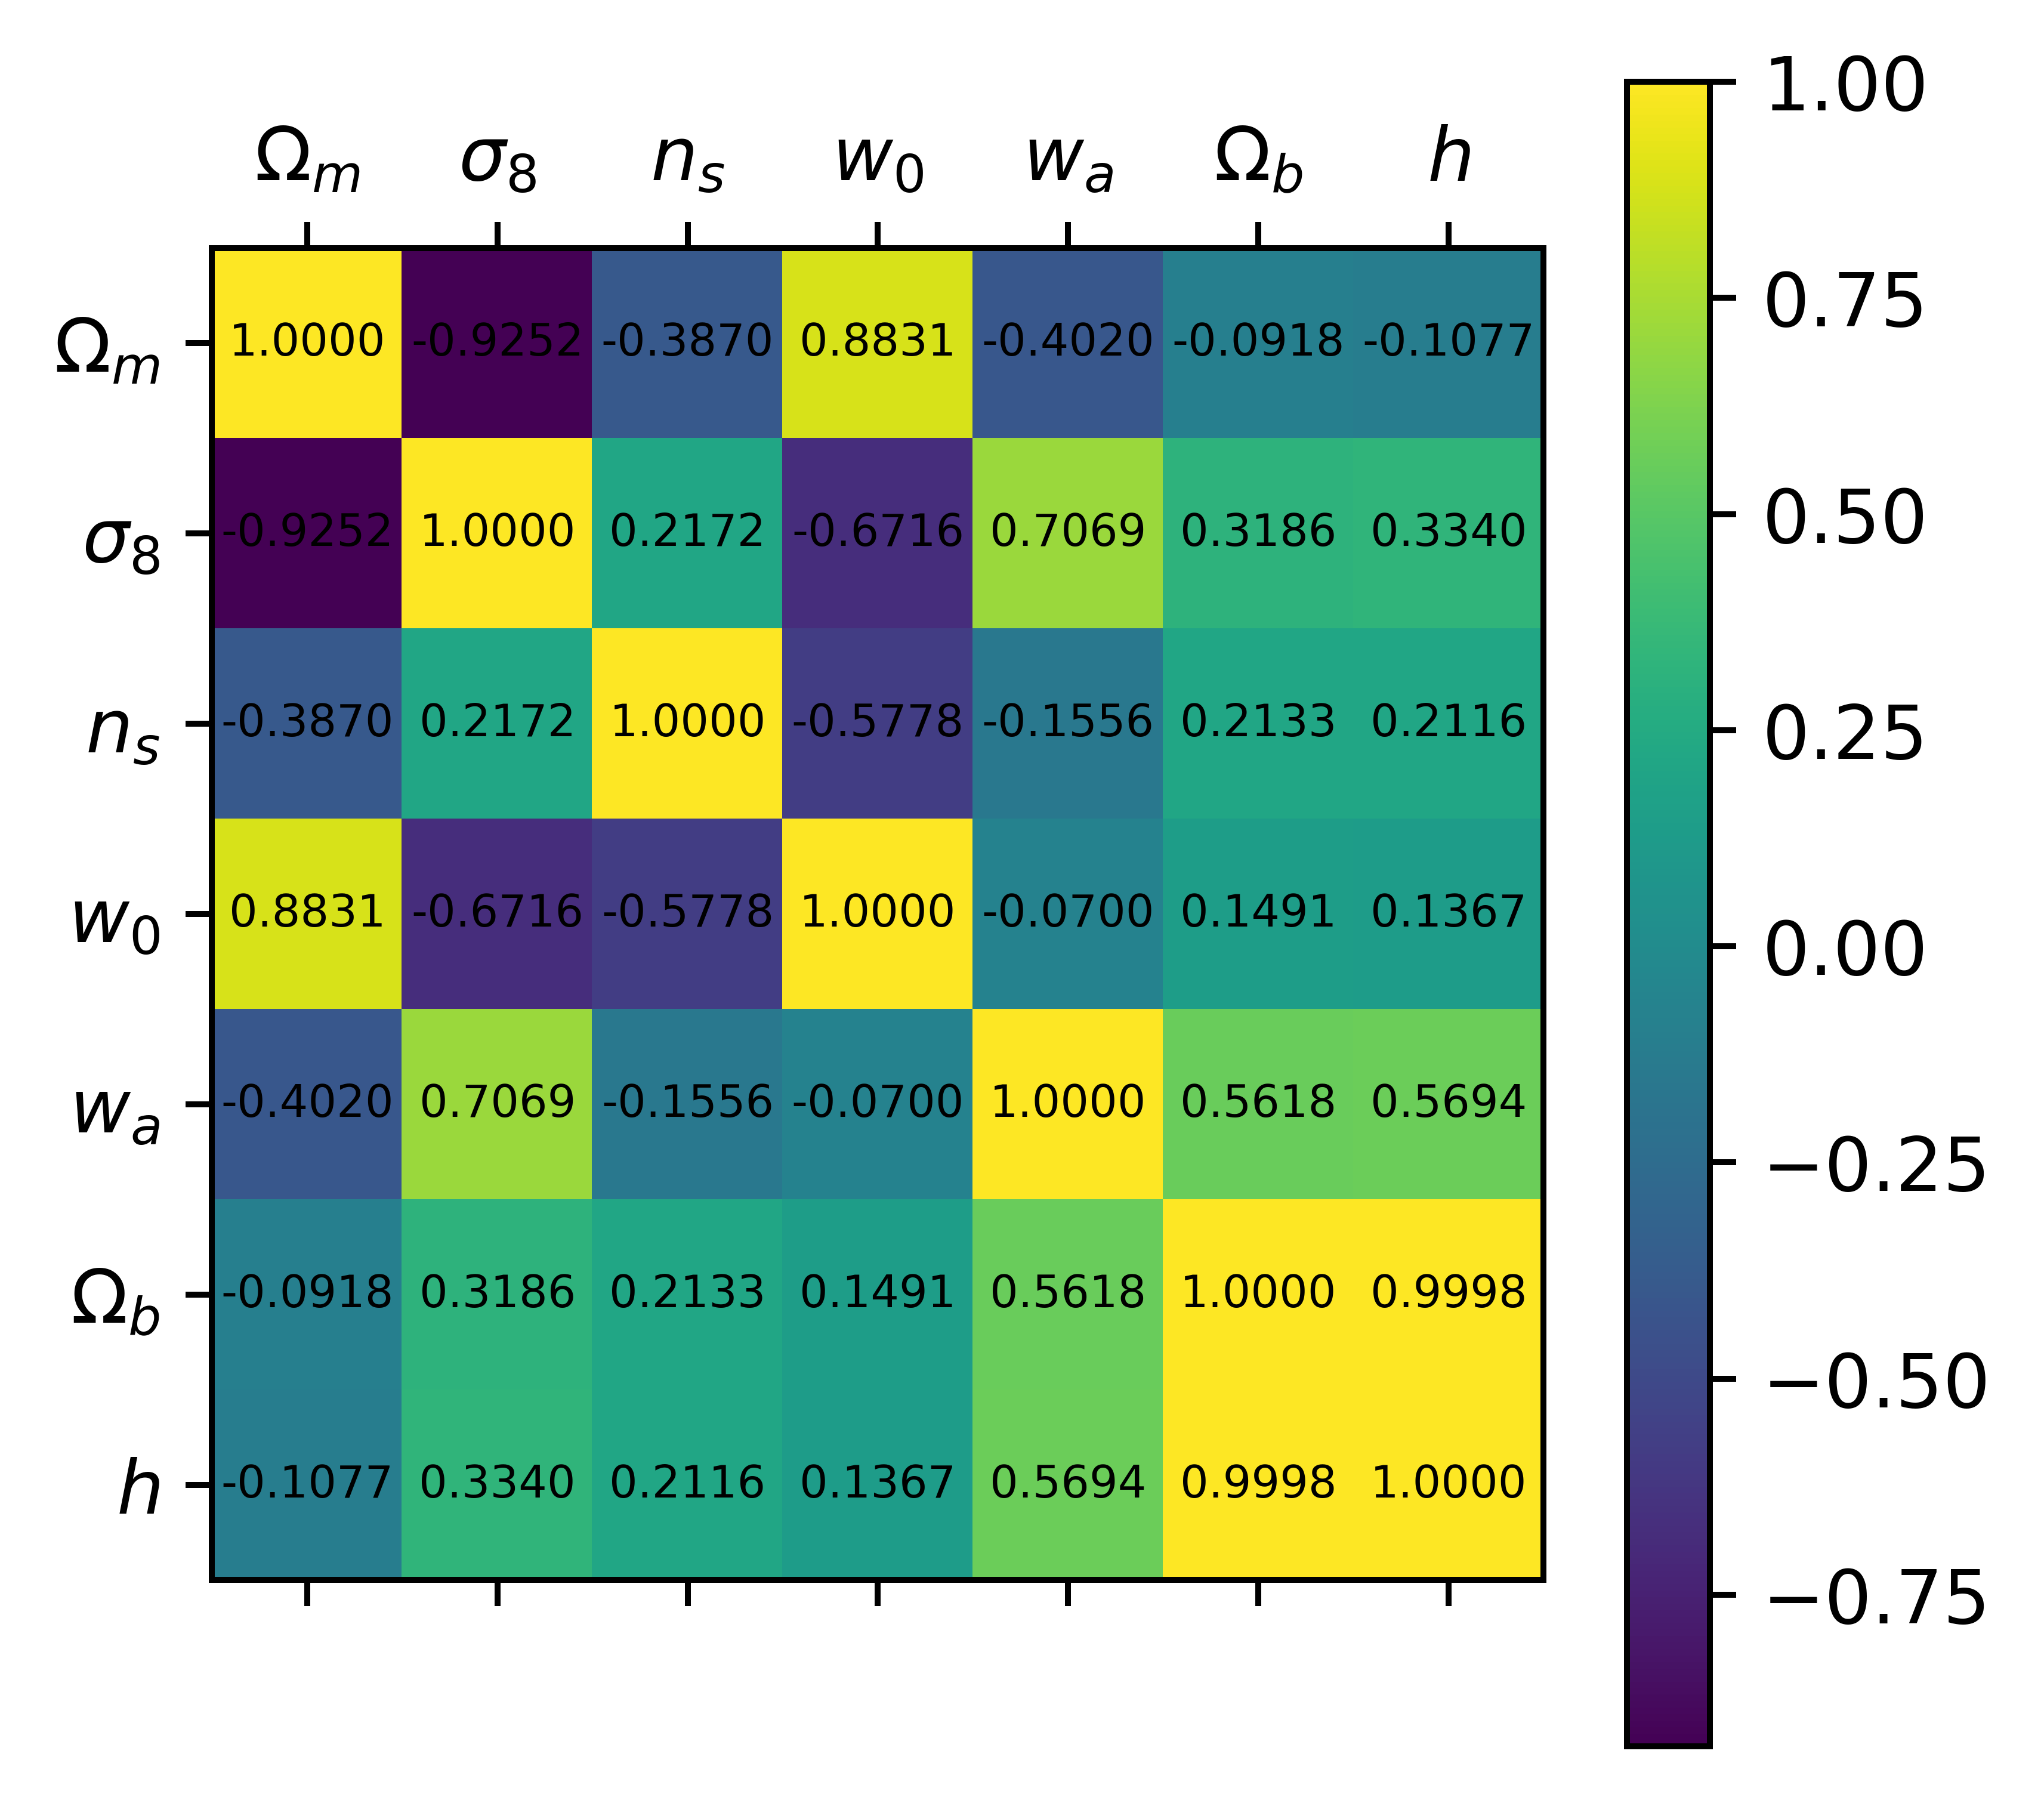

In [13]:
covar_p_f ={}
cor_p_f = {}

covar_p_f["n_4"] = cov_cosmo_para(fisher_f["n_4"])
cor_p_f["n_4"] = corr_cosmo_para(covar_p_f["n_4"])

plot_corr(cor_p_f["n_4"])

Omega_m = 0.315 +- 0.35872706578315366

w_0 = -1 +- 0.028899297189858585

Figure of Merit for Omega_m and w_0 is 24.115073075600897



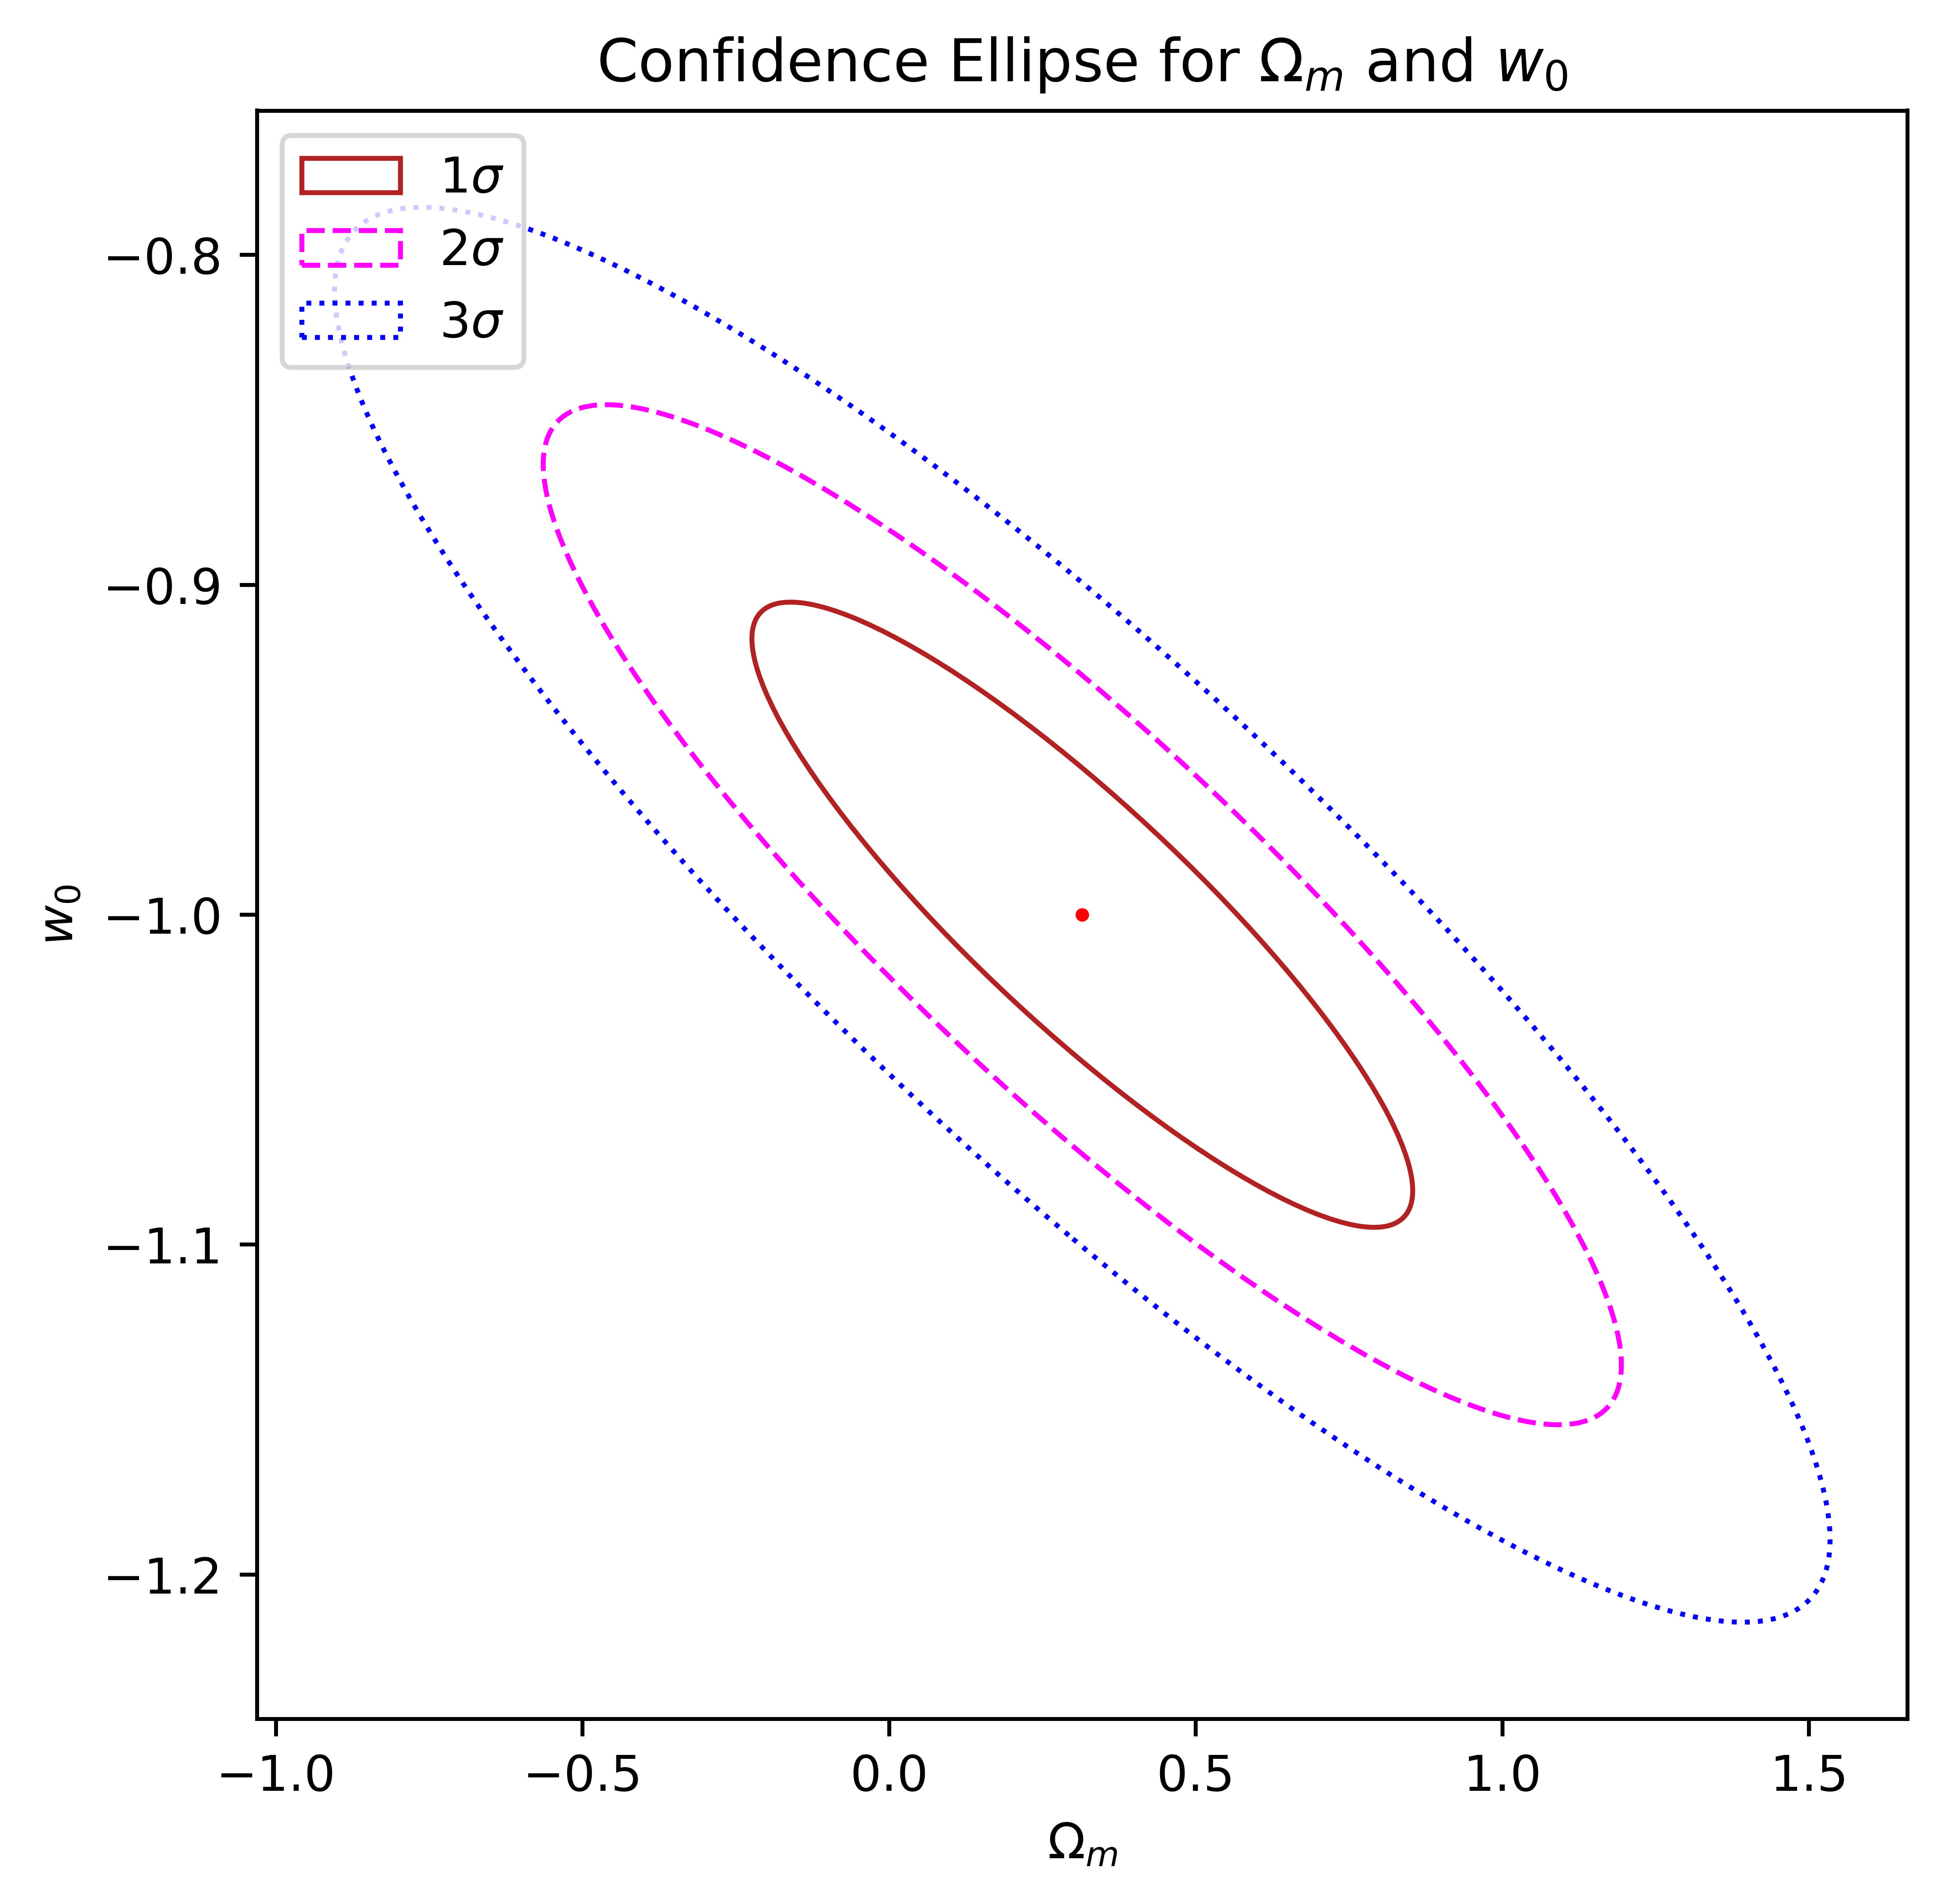

24.115073075600897

In [14]:
#try 'omega_m' and 'w_0'
plotConfidenceEllipse(covar_p_f["n_4"], "Omega_m", "w_0")

w_0 = -1 +- 0.354547065181663

w_a = 0 +- 0.11180668186827006

Figure of Merit for w_0 and w_a is 6.3066445590697136



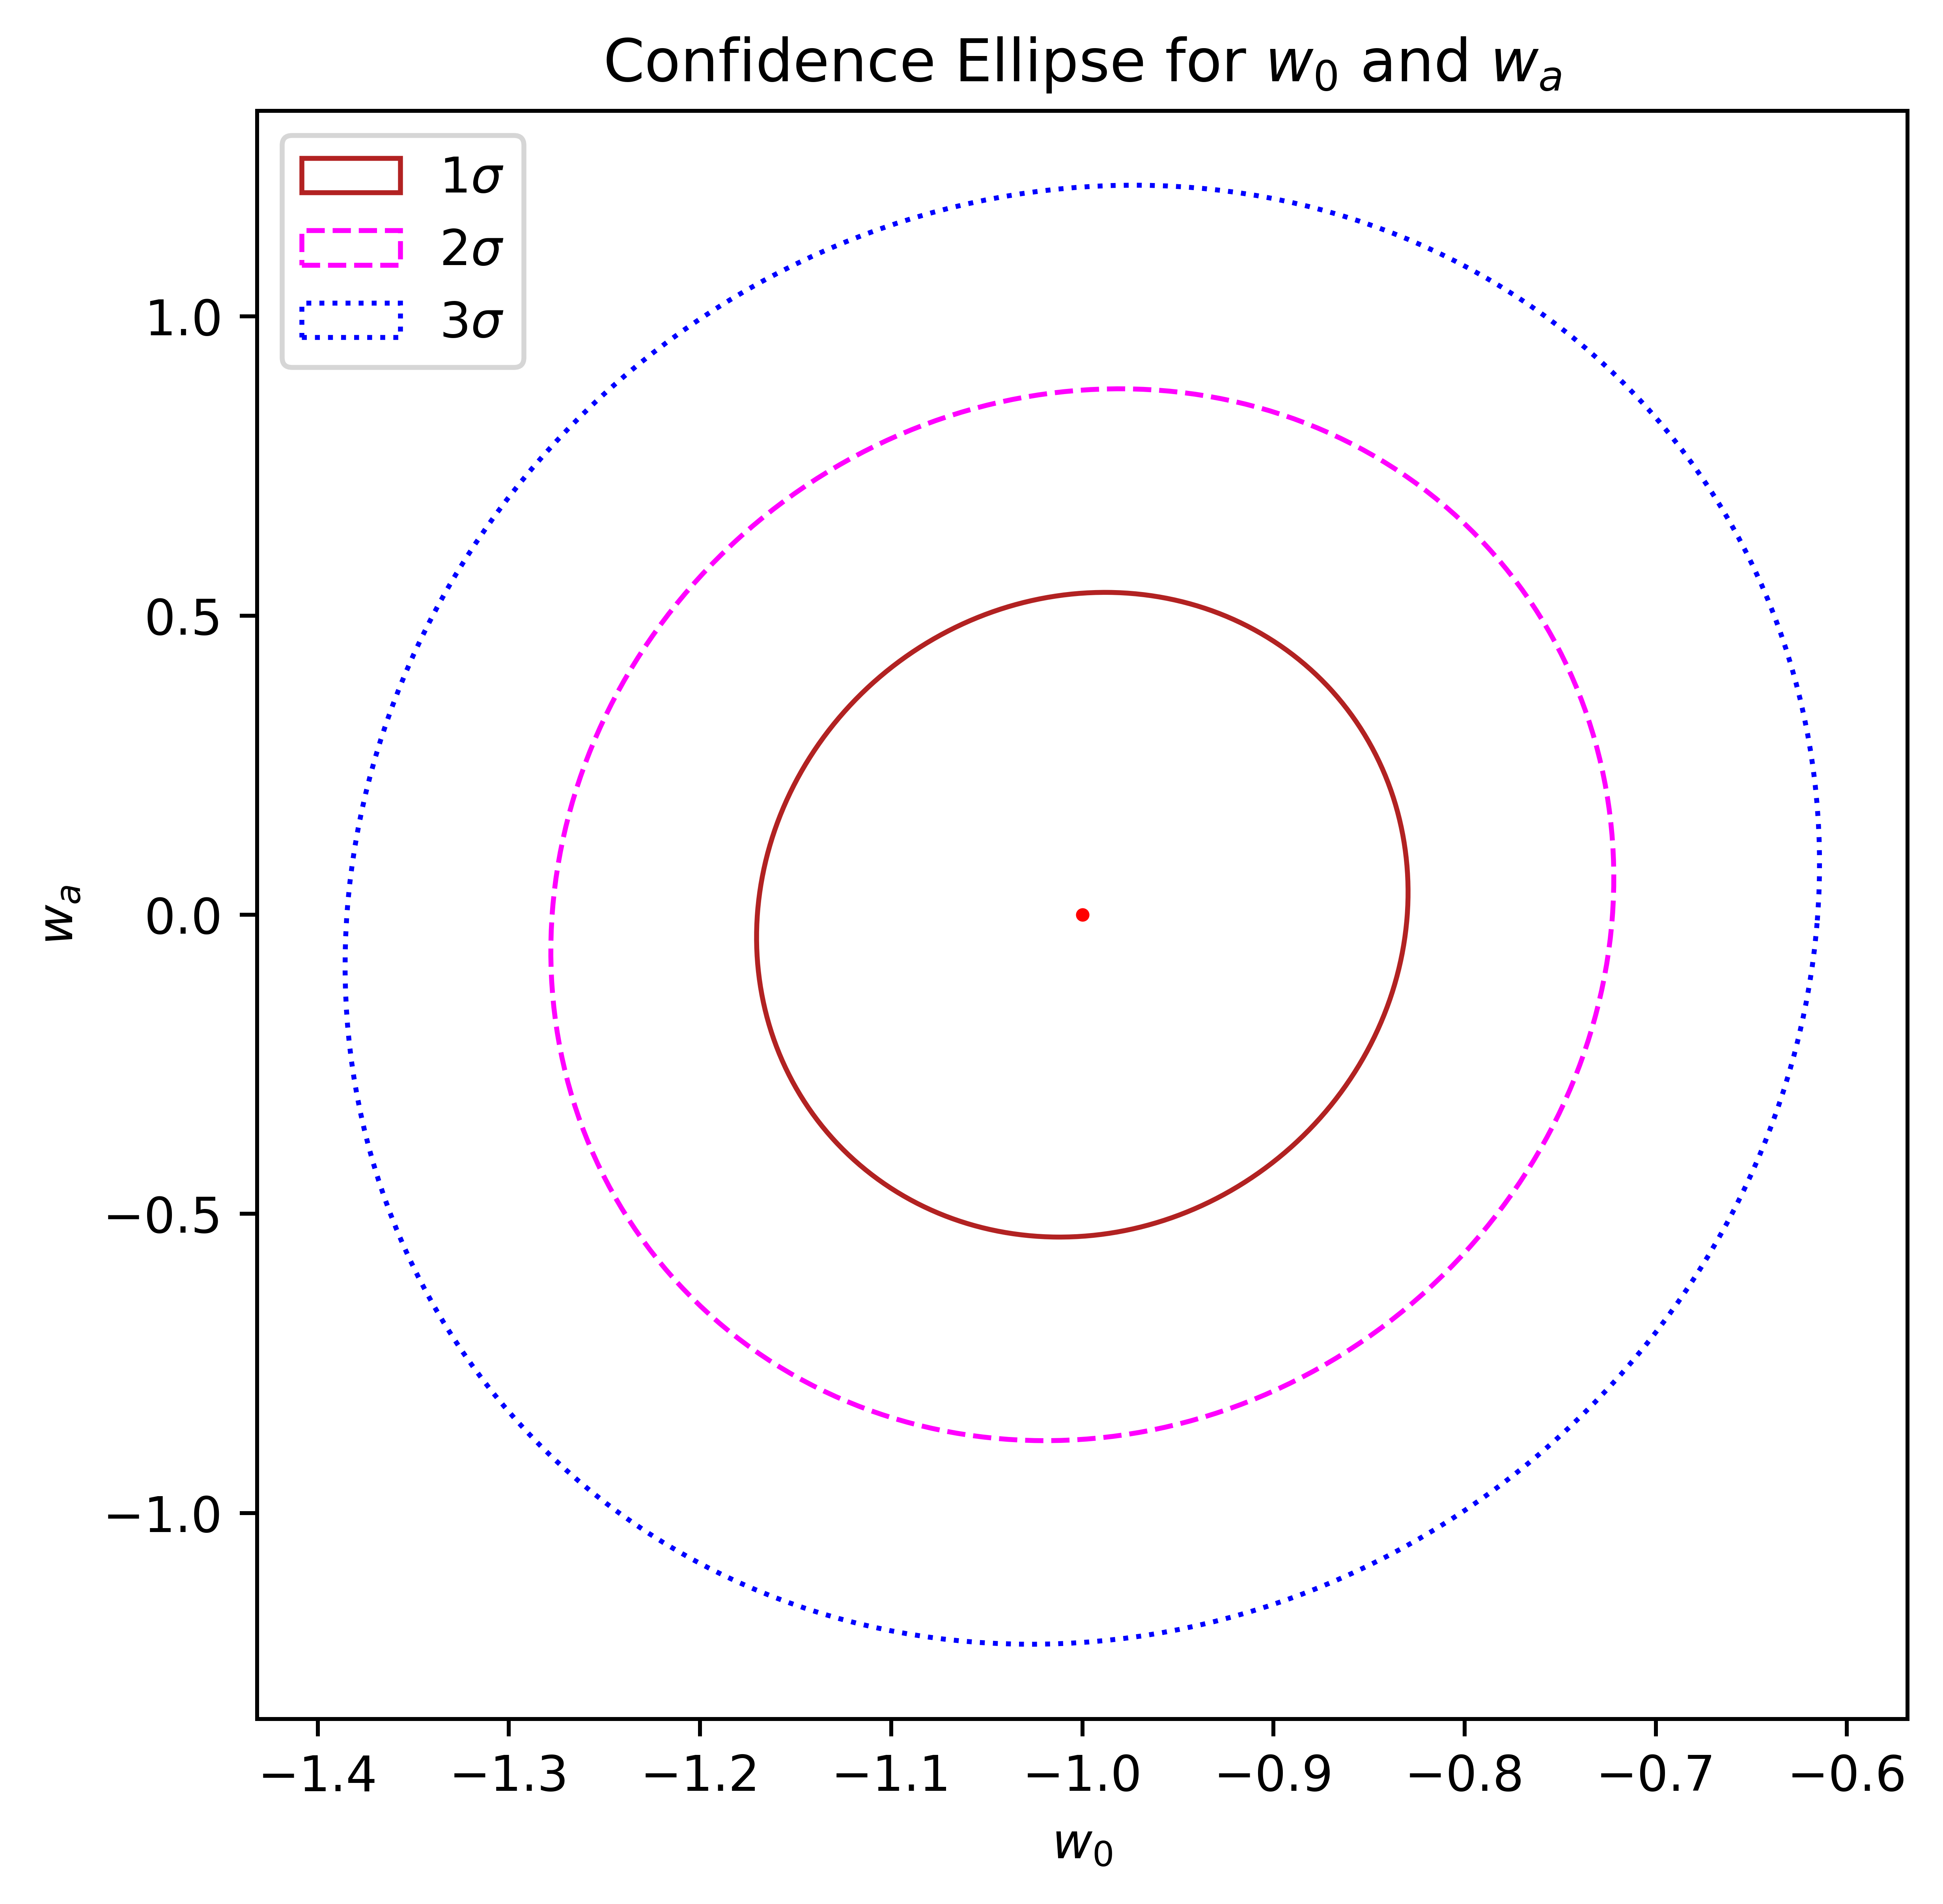

6.3066445590697136

In [15]:
plotConfidenceEllipse(covar_p_f["n_4"], "w_0", "w_a")

Omega_m = 0.315 +- 1.4796901072237345

Omega_b = 0.045 +- 0.06206655824237301

Figure of Merit for Omega_m and Omega_b is 2.722147006993902



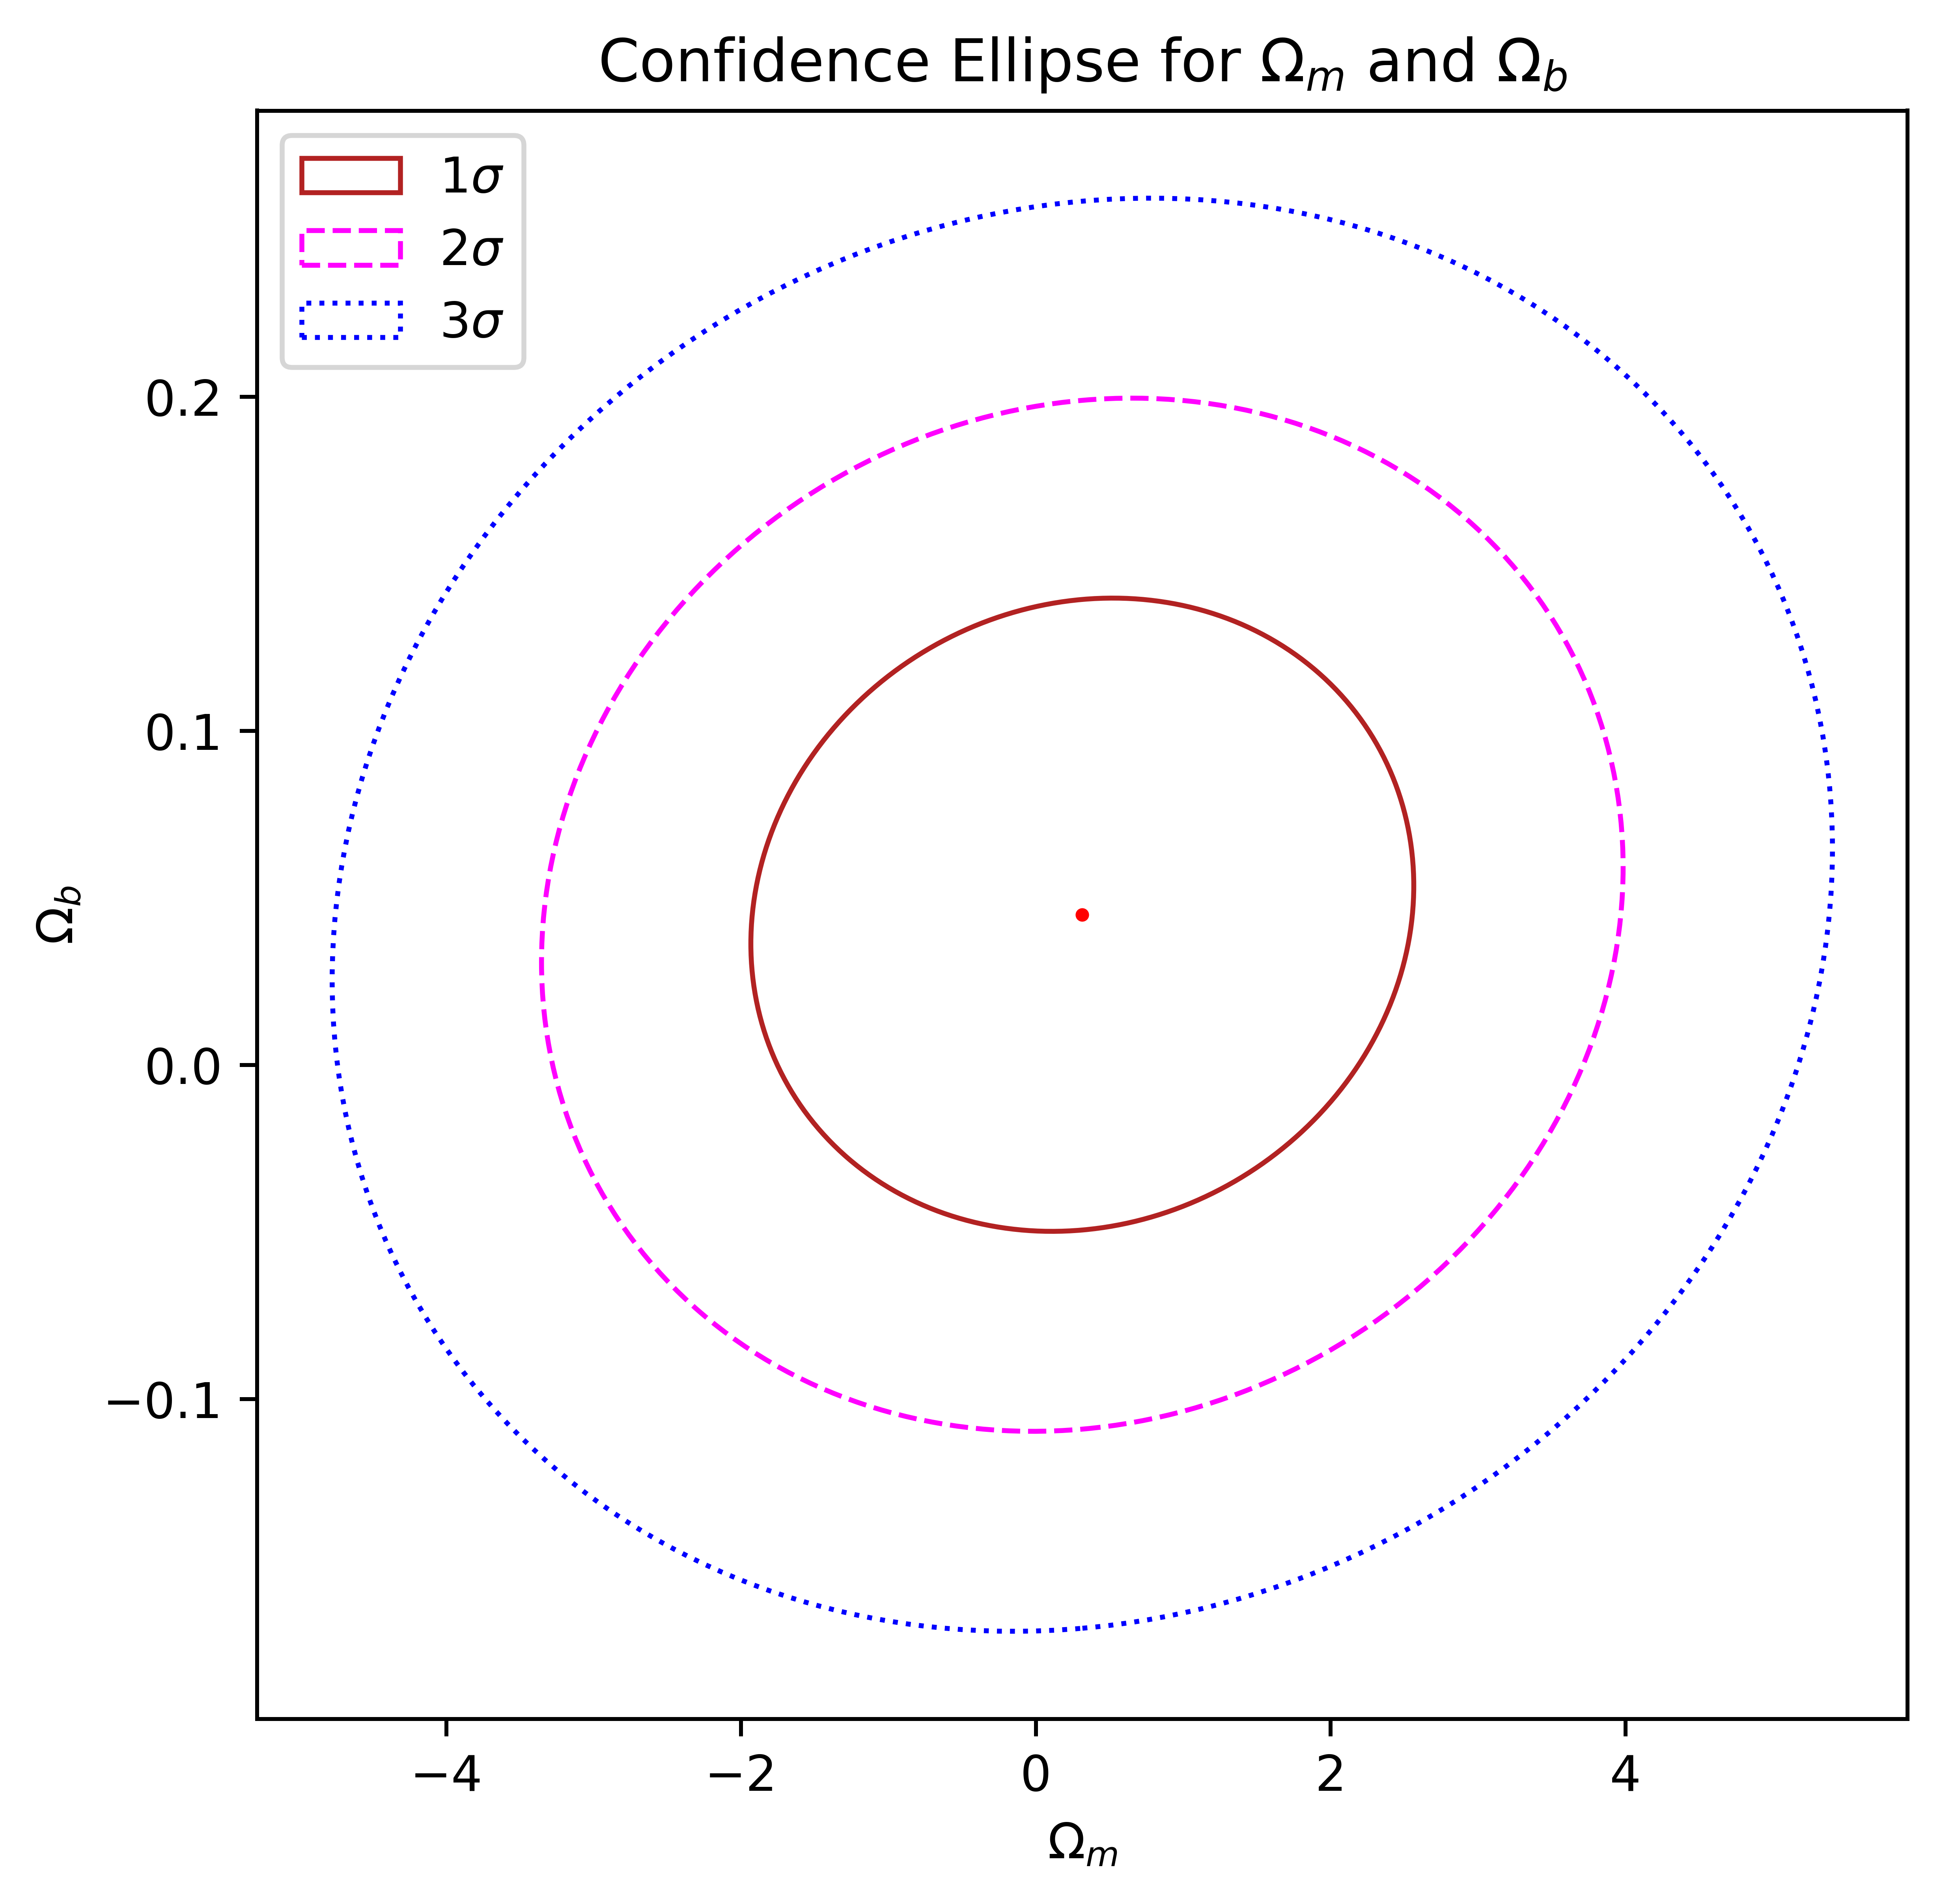

2.722147006993902

In [16]:
plotConfidenceEllipse(covar_p_f["n_4"], "Omega_m", "Omega_b")

That's impossible....